# Forecasts and Wisdom for the World after Covid: <br>Quantifying Uncertainty in Expert Reflections 

Igor Grossman, Eranda Jayawickreme, Michael Varnum, and John McLevey

## Supplementary Analysis for Dialectical Thinking

As a final confirmation, we also conducted a multi-step sentiment analysis that focused on the balance of positive and negative sentiment contained within each sentence of each individual response. For example, the following text

> "This pandemic has underscored societal inequalities along age, class, ethnic, regional and gender lines. The pandemic has not caused these inequalities, but it's put a spotlight on them. Disease affects certain ethnic and age groups more than others, a woman's contribution to the economy is likely to be hit harder than man's, and those who have entered COVID-19 with ongoing major problems such as poverty, political instability, and corruption, will have a harder time coming out of it in one piece. Alongside of all this, we have also realized one more time, that we all depend on each other in our lives are interconnected in so many different ways. I expect and perhaps more so hope, that this picture will motivate us to work towards understanding why this pandemic hits certain groups harder than others. As a result, it will motivate us to pick up a stronger fight against the unfair distribution of resources and rights not just where we live, but much more globally."

was first segmented into sentences. We conducted a rules-based sentiment analysis to compute a compound sentiment score for each sentence in each response. These are normalized, weighted composite scores ranging from -1 to 1, where -1 is the negative extreme and 1 is the positive extreme. Each response is then summarized as a vector of these compound sentiment scores, where the length of the vector is equal to the number of sentences in the individual response.

The balance of these compound scores across sentences in any given response can give us a general picture of the direction each expert leans when responding to a given question. For example, if they focus almost exclusively on the positives, then their sentiment scores should be closer to 1, but if they tend to focus almost exclusively on the negative, then they should tend towards -1. In both cases we would expect to see little variables in these scores if the emphasis is indeed consistently leaning towards the positive or the negative. If there is a balance between a consideration of positives and negatives, then the sentiment scores will be more variable with a mean closer to 0.

- split into 5 questions; vertical graphs for each question side by side in one row of plots

In [34]:
import pandas as pd
import numpy as np
from scipy import stats

import spacy 
nlp = spacy.load('en_core_web_lg')
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from gensim.models.phrases import Phrases, Phraser
from gensim.utils import simple_preprocess
import matplotlib.pyplot as plt

# Data

In [3]:
d = pd.read_csv('data/from_igor/transcripts.csv', encoding='Latin1')

In [4]:
q1 = d['Q1'].tolist()
q2 = d['Q2'].tolist()
q3 = d['Q3'].tolist()
q4 = d['Q4'].tolist()
q5 = d['Q5'].tolist()

alltext = q1 + q2 + q3 + q4 + q5

# Functions

- NOTE: STDS are not STDS anymore. They are **standard errors**. Clean this shit up ASAP! 

In [43]:
def scrub(texts):
    scrubbed = [str(t).replace('Â','').replace('â','') for t in texts]
    return scrubbed
    
def get_sentences(doc):
    sentences = [s.text for s in doc.sents]
    return sentences
    
def get_sentiment(sentence):
    return analyzer.polarity_scores(sentence)

def sentiment(texts):
    texts = scrub(texts)
    docs = list(nlp.pipe(texts))

    results = []
    for doc in docs:
        docsentisent = {}
        sentences = get_sentences(doc)
    
        sentence_scores_compound = []
        for sentence in sentences:
            score = get_sentiment(sentence)
            sentence_scores_compound.append(score['compound'])     
            
        docsentisent = sentence_scores_compound
        results.append(docsentisent)
    return results

def sentiment_summary(sentiment_scores):
    means = []
    stds = []
    for scores in sentiment_scores:
        means.append(float(np.mean(scores)))
        stds.append(float(np.std(scores)/np.sqrt(len(scores)))) # switched from STD to standard error.
    return means, stds

def get_positives_negatives(texts):
    texts = scrub(texts)
    docs = list(nlp.pipe(texts))

    results = []
    for doc in docs:
        docsentisent = {}
        sentences = get_sentences(doc)
    
        sentence_scores_compound = []
        for sentence in sentences:
            score = get_sentiment(sentence)
            sentence_scores_compound.append([score['pos'], score['neg']])     
            
        docsentisent = sentence_scores_compound
        results.append(docsentisent)
    return results

# Pre-Processing & Sentiment Analysis

In [37]:
q1sentiment = sentiment(q1)
q2sentiment = sentiment(q2)
q3sentiment = sentiment(q3)
q4sentiment = sentiment(q4)
q5sentiment = sentiment(q5)

In [38]:
mq1, sq1 = sentiment_summary(q1sentiment)
mq2, sq2 = sentiment_summary(q2sentiment)
mq3, sq3 = sentiment_summary(q3sentiment)
mq4, sq4 = sentiment_summary(q4sentiment)
mq5, sq5 = sentiment_summary(q5sentiment)

In [39]:
stds = np.array([sq1, sq2, sq3, sq4, sq5])

# Plots

This plot will not be included in the report. It was the baseline exploratory plot the others were built on top of. Keeping it here in case it is needed later.

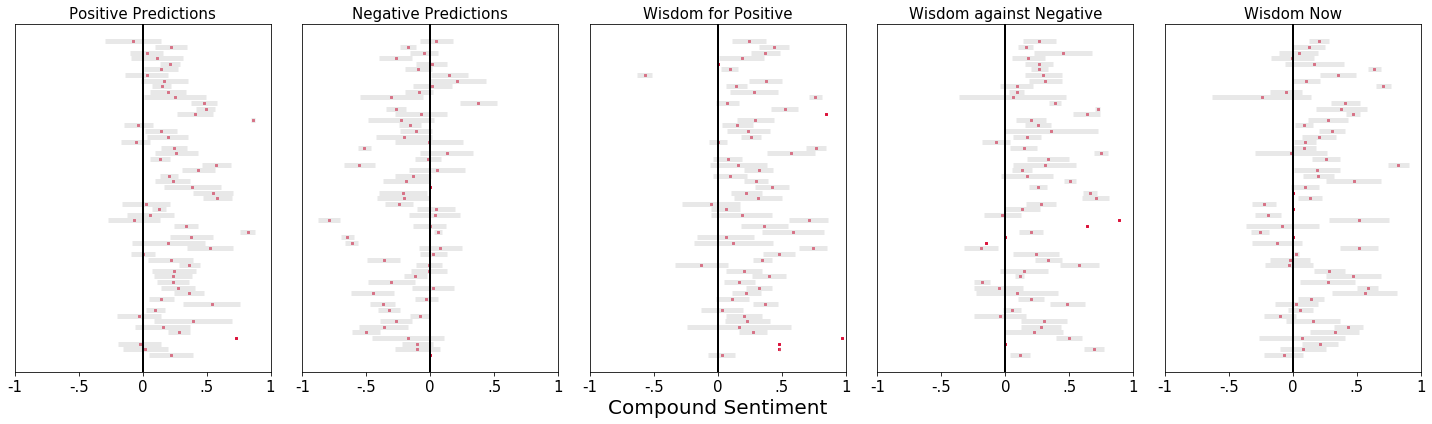

In [42]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(20, 6))

# QUESTION 1

ax1.yaxis.set_major_formatter(plt.NullFormatter())

for i,m in enumerate(mq1):
    ax1.errorbar(m, i, xerr=sq1[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
    ax1.axvline(0, color='black')
    ax1.scatter(m, i, color='crimson', s=6, marker='s')
    plt.xlim(-1,1)
    ax1.set_xticks([-1,-.5,0,.5,1])
    ax1.set_xticklabels(["-1","-.5","0",".5","1"])
    ax1.axes.yaxis.set_visible(False)
    ax1.set_title('Positive Predictions', size=15)
    ax1.tick_params(axis='x', labelsize=15)
#     ax1.set_xlabel('Compound Sentiment', fontsize = 20)
    
# QUESTION 3

for i,m in enumerate(mq3):
    ax2.errorbar(m, i, xerr=sq3[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
    ax2.axvline(0, color='black')
    ax2.scatter(m, i, color='crimson', s=6, marker='s')
    ax2.axes.yaxis.set_visible(False)
    ax2.axes.yaxis.set_visible(False)
    ax2.set_title('Negative Predictions', size=15)
    ax2.tick_params(axis='x', labelsize=15)
#     ax2.set_xlabel('Compound Sentiment', fontsize = 20)

# QUESTION 2

for i,m in enumerate(mq2):
    ax3.errorbar(m, i, xerr=sq2[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
    ax3.axvline(0, color='black')
    ax3.axes.yaxis.set_visible(False)
    ax3.scatter(m, i, color='crimson', s=6, marker='s')
    ax3.set_title('Wisdom for Positive', size=15)
    ax3.tick_params(axis='x', labelsize=15)
    ax3.set_xlabel('Compound Sentiment', fontsize = 20)

# QUESTION 4

for i,m in enumerate(mq4):
    ax4.errorbar(m, i, xerr=sq4[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
    ax4.axvline(0, color='black')
    ax4.axes.yaxis.set_visible(False)
    ax4.scatter(m, i, color='crimson', s=6, marker='s')
    ax4.set_title('Wisdom against Negative', size=15)
    ax4.tick_params(axis='x', labelsize=15)
#     ax4.set_xlabel('Compound Sentiment', fontsize = 20)

# QUESTION 5

for i,m in enumerate(mq5):
    ax5.errorbar(m, i, xerr=sq5[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
    ax5.axvline(0, color='black')
    ax5.axes.yaxis.set_visible(False)
    ax5.scatter(m, i, color='crimson', s=6, marker='s')
    ax5.set_title('Wisdom Now', size=15)
    ax5.tick_params(axis='x', labelsize=15)
#     ax5.set_xlabel('Compound Sentiment', fontsize = 20)
       
# fig.text(0.5, 0.04, 'Compound Sentiment Scores', ha='center')
plt.tight_layout()        
plt.savefig('sentiments.png', dpi=600)

# Alternate Plots

The plot below is a bit like a coefficient plot, but I am not going to use it because the ECDF is more informative.

In [ ]:
# fig, ax = plt.subplots()

# questions = [mq1, mq2, mq3, mq4, mq5]
# for i,q in enumerate(questions):
#     ax.errorbar(np.mean(q),i+1, xerr=np.std(q), fmt='.k', ecolor='lightgray', 
#                 elinewidth=10, ms=8, marker='s')

# ax.set_xticks([-1,-.5,0,.5,1])
# ax.set_xticklabels(["-1","-.5","0",".5","1"])
    
# ax.set_yticks([1,2,3,4,5])
# ax.set_yticklabels(["Q1","Q2","Q3","Q4","Q5"])

# plt.show()

# Paths

These are purely exploratory. Not for inclusion in the final report.

In [11]:
q1pn = get_positives_negatives(q1)
q2pn = get_positives_negatives(q2)
q3pn = get_positives_negatives(q3)
q4pn = get_positives_negatives(q4)
q5pn = get_positives_negatives(q5)

In [12]:
def create_small_multiples(pn, savepath):
    fig, ax = plt.subplots(nrows=12, ncols=5, sharex=True, sharey=True, figsize=(18,30))

    data = np.array(pn[0])
    ax[0,0].plot(data[:, 0], data[:, 1], color='black', linewidth=3, marker='>')
    data = np.array(pn[1])
    ax[0,1].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[2])
    ax[0,2].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[3])
    ax[0,3].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[4])
    ax[0,4].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[5])
    ax[1,0].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[6])
    ax[1,1].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[7])
    ax[1,2].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[8])
    ax[1,3].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[9])
    ax[1,4].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[10])
    ax[2,0].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[11])
    ax[2,1].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[12])
    ax[2,2].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[13])
    ax[2,3].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[14])
    ax[2,4].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[15])
    ax[3,0].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[16])
    ax[3,1].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[17])
    ax[3,2].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[18])
    ax[3,3].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[19])
    ax[3,4].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[20])
    ax[4,0].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[21])
    ax[4,1].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[22])
    ax[4,2].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[23])
    ax[4,3].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[24])
    ax[4,4].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[25])
    ax[5,0].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[26])
    ax[5,1].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[27])
    ax[5,2].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[28])
    ax[5,3].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[29])
    ax[5,4].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[30])
    ax[6,0].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[31])
    ax[6,1].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[32])
    ax[6,2].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[33])
    ax[6,3].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[34])
    ax[6,4].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[35])
    ax[7,0].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[36])
    ax[7,1].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[37])
    ax[7,2].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[38])
    ax[7,3].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[39])
    ax[7,4].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[40])
    ax[8,0].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[41])
    ax[8,1].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[42])
    ax[8,2].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[43])
    ax[8,3].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[44])
    ax[8,4].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[45])
    ax[9,0].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[46])
    ax[9,1].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[47])
    ax[9,2].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[48])
    ax[9,3].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[49])
    ax[9,4].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[50])
    ax[10,0].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[51])
    ax[10,1].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[52])
    ax[10,2].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[53])
    ax[10,3].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[54])
    ax[10,4].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[55])
    ax[11,0].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    data = np.array(pn[56])
    ax[11,1].plot(data[:, 0], data[:, 1], color='black', linewidth=3)
    
    
    ax[11,2].axis('off')
    ax[11,3].axis('off')
    ax[11,4].axis('off')
    
    # plt.xlabel('Proportion of Positive Sentiment (Per Sentence)')
    # plt.ylabel('Proportion of Negative Sentiment (Per Sentence)')
    
    plt.tight_layout()
    plt.savefig(savepath, dpi=300)
    plt.close()


In [13]:
create_small_multiples(q1pn, 'sentiment_path_q1.png')
create_small_multiples(q2pn, 'sentiment_path_q2.png')
create_small_multiples(q3pn, 'sentiment_path_q3.png')
create_small_multiples(q4pn, 'sentiment_path_q4.png')
create_small_multiples(q5pn, 'sentiment_path_q5.png')

# Nested Small Multiples

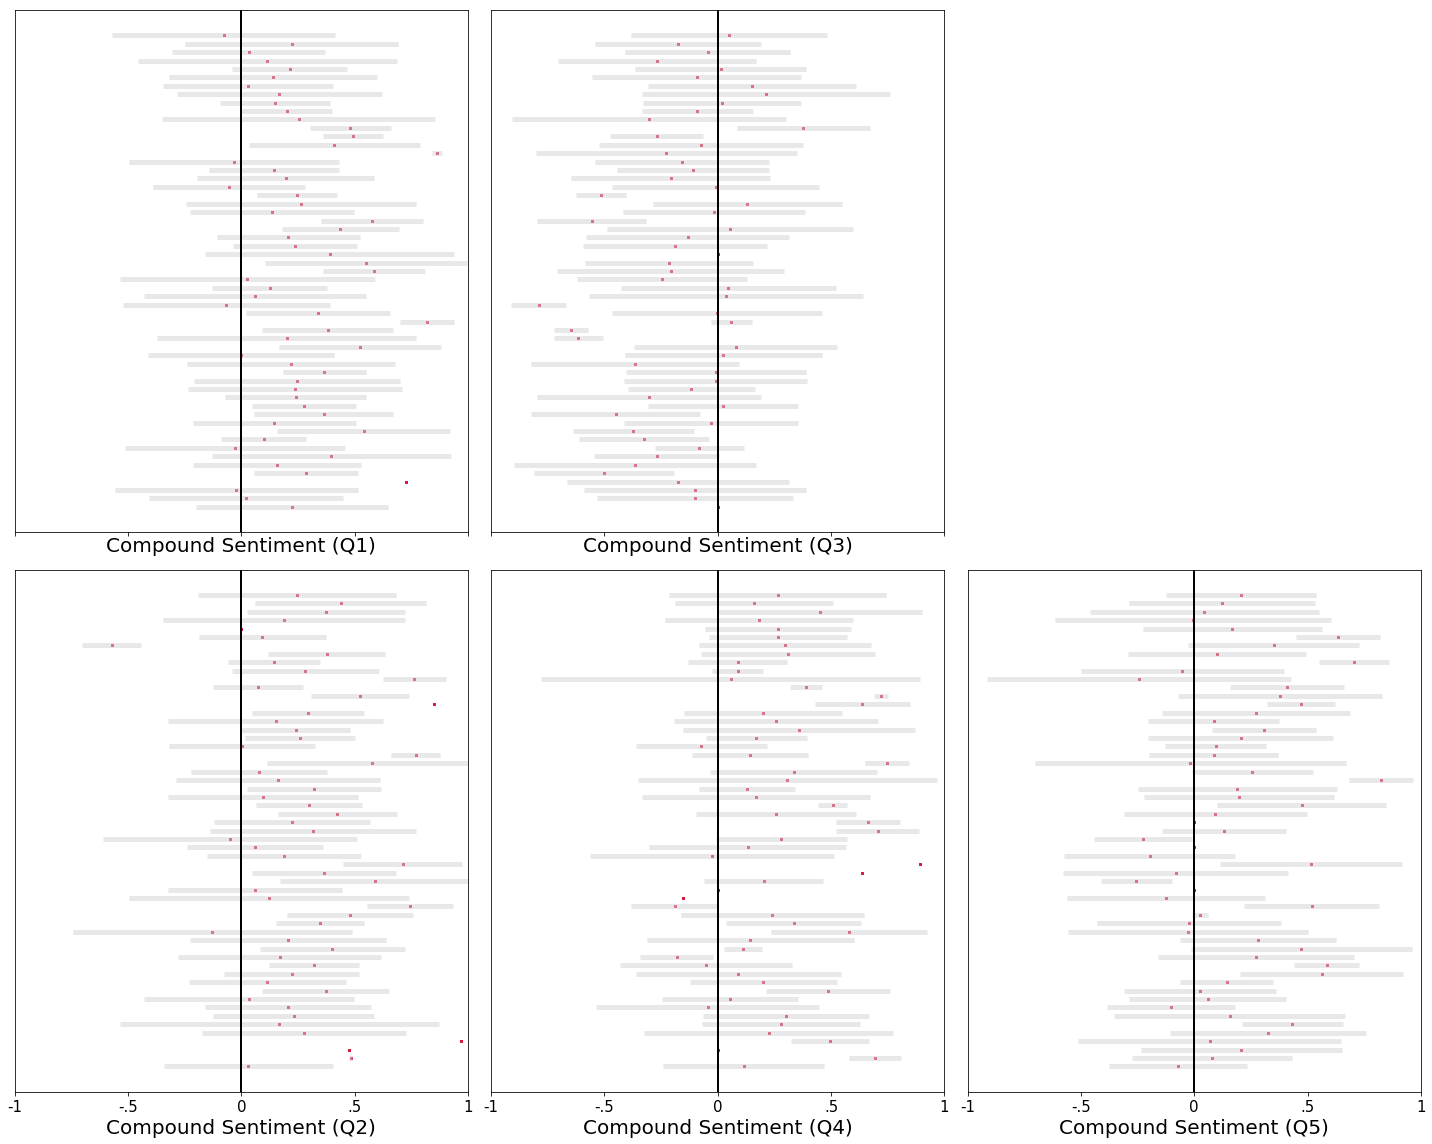

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 16))

# QUESTION 1

ax[0,0].yaxis.set_major_formatter(plt.NullFormatter())
ax[0,1].yaxis.set_major_formatter(plt.NullFormatter())
ax[1,0].yaxis.set_major_formatter(plt.NullFormatter())
ax[1,1].yaxis.set_major_formatter(plt.NullFormatter())
ax[1,2].yaxis.set_major_formatter(plt.NullFormatter())

for i,m in enumerate(mq1):
    ax[0,0].errorbar(m, i, xerr=sq1[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
    ax[0,0].axvline(0, color='black')    
    ax[0,0].scatter(m, i, color='crimson', s=6, marker='s')
    plt.xlim(-1,1)
    ax[0,0].set_xticks([-1,-.5,0,.5,1])
    ax[0,0].set_xticklabels(["-1","-.5","0",".5","1"])
    ax[0,0].axes.yaxis.set_visible(False)
    #ax[0,0].title.set_text('Question 1 Responses')
    ax[0,0].tick_params(axis='x', labelsize=15)
    ax[0,0].set_xlabel('Compound Sentiment (Q1)', fontsize = 20)
    
# # QUESTION 3

for i,m in enumerate(mq3):
    ax[0,1].errorbar(m, i, xerr=sq3[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
    ax[0,1].axvline(0, color='black')
    ax[0,1].axes.yaxis.set_visible(False)
    
#     ax[0,1].axvline(np.mean(mq3)-(np.std(mq3)/2), color='crimson', alpha=.2)
#     ax[0,1].axvline(np.mean(mq3), color='crimson')
#     ax[0,1].axvline(np.mean(mq3)+(np.std(mq3)/2), color='crimson', alpha=.2)
    
    ax[0,1].scatter(m, i, color='crimson', s=6, marker='s')
#     ax[0,1].title.set_text('Question 3 Responses')
    ax[0,1].tick_params(axis='x', labelsize=15)
    ax[0,1].set_xlabel('Compound Sentiment (Q3)', fontsize = 20)    
    

# EMPTY PLOT
ax[0,2].axis('off')

# QUESTION 2

for i,m in enumerate(mq2):
    ax[1,0].errorbar(m, i, xerr=sq2[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
    ax[1,0].axvline(0, color='black')
    ax[1,0].axes.yaxis.set_visible(False)
    ax[1,0].scatter(m, i, color='crimson', s=6, marker='s')
    #ax[1,0].title.set_text('Question 2 Responses')
    ax[1,0].tick_params(axis='x', labelsize=15)
    ax[1,0].set_xlabel('Compound Sentiment (Q2)', fontsize = 20)
    
# # QUESTION 4

for i,m in enumerate(mq4):
    ax[1,1].errorbar(m, i, xerr=sq4[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
    ax[1,1].axvline(0, color='black')
    ax[1,1].axes.yaxis.set_visible(False)
    ax[1,1].scatter(m, i, color='crimson', s=6, marker='s')
    #ax[1,1].title.set_text('Question 4 Responses')
    ax[1,1].tick_params(axis='x', labelsize=15)
    ax[1,1].set_xlabel('Compound Sentiment (Q4)', fontsize = 20)

# # QUESTION 5

for i,m in enumerate(mq5):
    ax[1,2].errorbar(m, i, xerr=sq5[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
    ax[1,2].axvline(0, color='black')
    ax[1,2].axes.yaxis.set_visible(False)
    ax[1,2].scatter(m, i, color='crimson', s=6, marker='s')
    #ax[1,2].title.set_text('Question 5 Responses')
    ax[1,2].tick_params(axis='x', labelsize=15)
    ax[1,2].set_xlabel('Compound Sentiment (Q5)', fontsize = 20)
       
plt.tight_layout()        
plt.savefig('sentiments.png', dpi=600)

# ECDFs

In [45]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return(x,y)

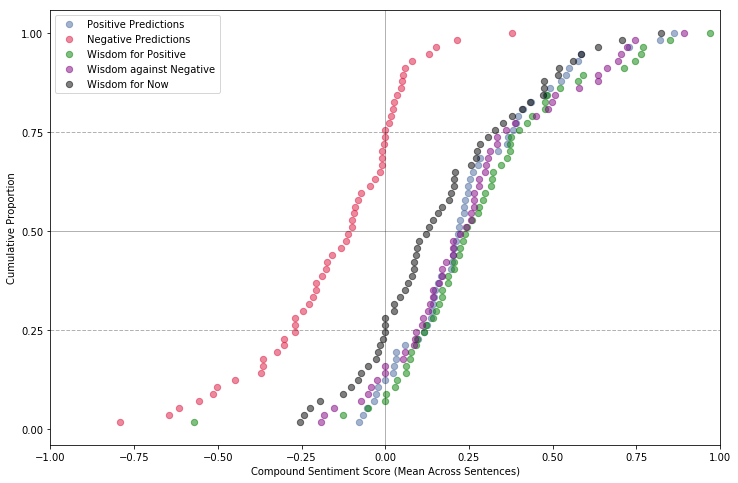

In [47]:
mq1_x, mq1_y = ecdf(mq1)
mq2_x, mq2_y = ecdf(mq2)
mq3_x, mq3_y = ecdf(mq3)
mq4_x, mq4_y = ecdf(mq4)
mq5_x, mq5_y = ecdf(mq5)


fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(mq1_x,mq1_y, c='#49699E', alpha=.5, s=40, marker='o', label='Positive Predictions')
ax.scatter(mq3_x,mq3_y, c='crimson', alpha=.5, s=40, marker='o', label='Negative Predictions')
ax.scatter(mq2_x,mq2_y, c='green', alpha=.5, s=40, marker='o', label='Wisdom for Positive')
ax.scatter(mq4_x,mq4_y, c='purple', alpha=.5, s=40, marker='o', label='Wisdom against Negative')
ax.scatter(mq5_x,mq5_y, c='black', alpha=.5, s=40, marker='o', label='Wisdom for Now')


# interquartile range with median
ax.set_yticks([0,.25, .5, .75, 1])
# ax.set_yticklabels(['0', '25th', '50th', '75th', '100'])
# ax.set_xticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,.1])

ax.axhline(.5, c='black', linewidth=1, alpha=.3) # central tendency: median value
ax.axhline(.25, c='black', linestyle="--", linewidth=1, alpha=.3) # 25th percentile
ax.axhline(.75, c='black', linestyle="--", linewidth=1, alpha=.3) # 75th percentile
ax.axvline(0, color='black', linewidth=1, alpha=.3)

plt.xlabel('Compound Sentiment Score (Mean Across Sentences)')
plt.ylabel('Cumulative Proportion')
plt.legend()
plt.xlim(-1, 1)
plt.savefig('ecdf.png', dpi=600)

**This one would follow the small multiples.** In the small multiples, we show the distributions of scores for each sentence nested in a response. Here, we take the mean across all sentences and plot an ECDF to compare average tendencies. Combined with the previous plot, what this shows is ...

Figure XXX is an ECDF plot contrasting the distributions of compound sentiment scores across all five questions. The y-axis marks the 25th, 50th, and 75th percentiles. There are several things to note when interpreting this graph. First, the central tendency each is is fairly close to 0 (neutral sentiment), with Question 3 (which asked specifically about negatives) having 75 percent of responses being negative, but with the majority of the data being close to 0. Similarly the other four questions have the bulk of responses staying relatively close to neutral.

When we look across all experts and all questions, we note that the central tendency always leans in the direction expected given the question that was asked, and that in general...

In [ ]:
# for p in pn: # the full response from an expert
#     for each in p: # each sentence inside the response 
#         print(len(each)) # the positive and negative scores

In [ ]:
# fig, ax = plt.subplots()
# for e in pn:
#     data = np.array(e)
#     ax.plot(data[:, 0], data[:, 1])
# plt.show

In [ ]:
# data = np.array(pn[0])
# plt.plot(data[:, 0], data[:, 1])

## The Questions

1. If you were to predict the domain or aspect of social life where we might observe the most significant positive societal and/or psychological change in response to the pandemic, what would it be? 
2. What kind of wisdom will people need to capitalize on for the positive change you refer to above? 
3. If you were to predict the domain or aspect of social life where we might observe the most significant negative societal and/or psychological change in response to the pandemic, what would it be?  
4. What kind of wisdom will people need to master to overcome this major negative societal change after the pandemic? 
5. What one piece of wisdom do you think it is important to give people now to help them make it through the pandemic? 

In [ ]:
# fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(20, 16))

# # QUESTION 1

# ax1.yaxis.set_major_formatter(plt.NullFormatter())

# for i,m in enumerate(mq1):
#     ax[0,0].errorbar(m, i, xerr=sq1[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
#     ax[0,0].axvline(0, color='black')    
#     ax[0,0].scatter(m, i, color='crimson', s=6, marker='s')
#     plt.xlim(-1,1)
#     ax[0,0].set_xticks([-1,-.5,0,.5,1])
#     ax[0,0].set_xticklabels(["-1","-.5","0",".5","1"])
#     ax[0,0].axes.yaxis.set_visible(False)
#     ax[0,0].title.set_text('Question 1 Responses')
#     ax[0,0].tick_params(axis='x', labelsize=15)
# #     ax[0,0].set_xlabel('Compound Sentiment\nQuestion 1', fontsize = 20)
    
# # # QUESTION 3

# for i,m in enumerate(mq3):
#     ax[0,1].errorbar(m, i, xerr=sq3[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
#     ax[0,1].axvline(0, color='black')
    
# #     ax[0,1].axvline(np.mean(mq3)-(np.std(mq3)/2), color='crimson', alpha=.2)
# #     ax[0,1].axvline(np.mean(mq3), color='crimson')
# #     ax[0,1].axvline(np.mean(mq3)+(np.std(mq3)/2), color='crimson', alpha=.2)
    
#     ax[0,1].scatter(m, i, color='crimson', s=6, marker='s')
#     ax[0,1].title.set_text('Question 3 Responses')
#     ax[0,1].tick_params(axis='x', labelsize=15)
# #     ax[0,1].set_xlabel('Compound Sentiment\nQuestion 3', fontsize = 20)    
    

# # EMPTY PLOT
# ax[0,2].axis('off')

# # QUESTION 2

# for i,m in enumerate(mq2):
#     ax[1,0].errorbar(m, i, xerr=sq2[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
#     ax[1,0].axvline(0, color='black')
#     ax[1,0].scatter(m, i, color='crimson', s=6, marker='s')
#     #ax[1,0].title.set_text('Question 2 Responses')
#     ax[1,0].tick_params(axis='x', labelsize=15)
#     ax[1,0].set_xlabel('Compound Sentiment\nQuestion 2', fontsize = 20)
    
# # # QUESTION 4

# for i,m in enumerate(mq4):
#     ax[1,1].errorbar(m, i, xerr=sq4[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
#     ax[1,1].axvline(0, color='black')
#     ax[1,1].scatter(m, i, color='crimson', s=6, marker='s')
#     #ax[1,1].title.set_text('Question 4 Responses')
#     ax[1,1].tick_params(axis='x', labelsize=15)
#     ax[1,1].set_xlabel('Compound Sentiment\nQuestion 4', fontsize = 20)

# # # QUESTION 5

# for i,m in enumerate(mq5):
#     ax[1,2].errorbar(m, i, xerr=sq5[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=0)
#     ax[1,2].axvline(0, color='black')
#     ax[1,2].scatter(m, i, color='crimson', s=6, marker='s')
#     #ax[1,2].title.set_text('Question 5 Responses')
#     ax[1,2].tick_params(axis='x', labelsize=15)
#     ax[1,2].set_xlabel('Compound Sentiment\nQuestion 5', fontsize = 20)
       
# plt.tight_layout()        
# plt.savefig('sentiments.png', dpi=600)

In [ ]:
# fig, ax = plt.subplots(figsize=(10,40))

# for i,m in enumerate(means):
#     ax.errorbar(m, i, xerr=stds[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=3)
    
# for i,m in enumerate(means):    
#     ax.scatter(m, i, color='crimson', s=23)
    
# plt.axvline(0, color='black')    
    
# # ax.set_ylabel('Compound Sentiment Scores')
# # ax.set_xlabel('Sentence Indexes')

# # plt.yticks(fontsize=46)

# plt.tight_layout()        
# plt.savefig('sentiments.png', dpi=600)

# spacy


In [ ]:
docs = list(nlp.pipe(alltext))

In [ ]:
results = []

for doc in docs:
    docsentisent = {}
    sentences = get_sentences(doc)
    
    sentence_scores_compound = []
    for sentence in sentences:
        score = get_sentiment(sentence)
        sentence_scores_compound.append(score['compound'])     
            
            
    docsentisent = sentence_scores_compound
    
    results.append(docsentisent)

In [ ]:
means = []
stds = []
for r in results:
    means.append(np.mean(r))
    stds.append(np.std(r))

In [ ]:
fig, ax = plt.subplots(figsize=(10,40))

for i,m in enumerate(means):
    ax.errorbar(m, i, xerr=stds[i], elinewidth=5, alpha=0.5, ecolor='lightgray', capsize=3)
    
for i,m in enumerate(means):    
    ax.scatter(m, i, color='crimson', s=23)
    
plt.axvline(0, color='black')    
    
# ax.set_ylabel('Compound Sentiment Scores')
# ax.set_xlabel('Sentence Indexes')

# plt.yticks(fontsize=46)

plt.tight_layout()        
plt.savefig('sentiments.png', dpi=600)

In [ ]:
fig, ax = plt.subplots(figsize=(30,10))

# for i,each in enumerate(results):
#     for r in each:
#         ax.scatter(i,r, color='gray', s=5)

for i,m in enumerate(means):
    ax.errorbar(i, m, yerr=stds[i], alpha=0.5, ecolor='black', capsize=3)
    
#     ax.scatter(i, m, color='crimson', s=5)
ax.set_ylabel('Compound Sentiment Scores')
ax.set_xlabel('Sentence Indexes')

plt.yticks(fontsize=46)

plt.tight_layout()        
plt.show()

In [ ]:
neg = [scores['neg'] for scores in doc_scores[0]]
neu = [scores['neu'] for scores in doc_scores[0]]
pos = [scores['pos'] for scores in doc_scores[0]]
com = [scores['compound'] for scores in doc_scores[0]]

In [ ]:
com

In [ ]:
sentences = []
chunks = []

for doc in docs:
    for sent in doc.sents:
        sentences.append(sent)
    for chunk in doc.noun_chunks:
        chunks.append(chunk)

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
sent_strings = [s.text for s in sentences]
chunk_strings = [c.text for c in chunks]

In [ ]:
def sentiment_analysis(texts):
    source = []
    sentiment = [] 
    for t in texts:
        source.append(t)
        sentiment.append(analyzer.polarity_scores(t))
    return source, sentiment

In [ ]:
s_text, s_sentiment = sentiment_analysis(sent_strings)
c_text, c_sentiment = sentiment_analysis(chunk_strings)

In [ ]:
df = pd.DataFrame(s_sentiment)
df['text'] = s_text

In [ ]:
df['compound'].plot()

In [ ]:
df.sort_values('pos', ascending=False)